In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, roc_auc_score,classification_report,roc_curve,auc
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import DistanceMetric
#from sklearn import AdaBoostClassifier
from xgboost import XGBClassifier
import shap
shap.initjs()


%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r train

In [4]:
clf = CatBoostClassifier(
    iterations=100, 
    learning_rate=0.001, 
    verbose=5,
)

clf.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
)


0:	learn: 0.6925125	test: 0.6925167	best: 0.6925167 (0)	total: 73.3ms	remaining: 7.26s
5:	learn: 0.6893211	test: 0.6893394	best: 0.6893394 (5)	total: 108ms	remaining: 1.7s
10:	learn: 0.6861634	test: 0.6861945	best: 0.6861945 (10)	total: 142ms	remaining: 1.15s
15:	learn: 0.6830275	test: 0.6830710	best: 0.6830710 (15)	total: 176ms	remaining: 925ms
20:	learn: 0.6799321	test: 0.6799884	best: 0.6799884 (20)	total: 210ms	remaining: 790ms
25:	learn: 0.6768705	test: 0.6769388	best: 0.6769388 (25)	total: 243ms	remaining: 690ms
30:	learn: 0.6738450	test: 0.6739248	best: 0.6739248 (30)	total: 277ms	remaining: 616ms
35:	learn: 0.6708371	test: 0.6709279	best: 0.6709279 (35)	total: 311ms	remaining: 553ms
40:	learn: 0.6678613	test: 0.6679621	best: 0.6679621 (40)	total: 346ms	remaining: 498ms
45:	learn: 0.6649148	test: 0.6650258	best: 0.6650258 (45)	total: 379ms	remaining: 445ms
50:	learn: 0.6619962	test: 0.6621168	best: 0.6621168 (50)	total: 412ms	remaining: 396ms
55:	learn: 0.6591041	test: 0.6592352

In [5]:
clf_pred=clf.predict(X_test)

In [6]:
print(clf)

In [7]:
print(X_test[1])

[-1.08719989 -0.95524149  0.04657717  1.78566143  1.08680498 -1.00970642
  0.15483584  0.73733136  1.58563494 -1.05206419  1.14569772 -0.20999477]


In [8]:
import pickle 
clf_model_pkl = pickle.dump(clf,open('CatBoostClassifier.pkl','wb'))

[[66813     0]
 [ 9409     0]]
0.8765579491485398


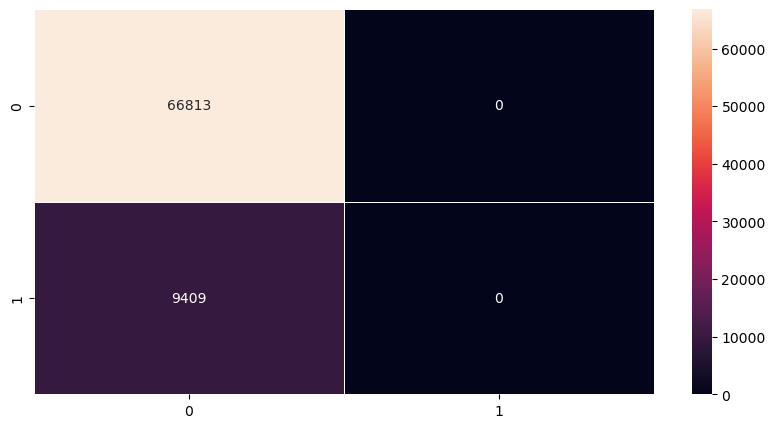

In [9]:
cm = confusion_matrix(y_test, clf_pred)
print(cm)
print(accuracy_score(y_test, clf_pred))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)
plt.show()

In [10]:
non_interested=train[train.Response==1]
interested=train[train.Response==0][:46710]
df=pd.concat([non_interested,interested])
data=df.sample(frac=1,random_state=42)
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
22472,Male,25,1,15.0,0,< 1 Year,No,37394.0,152.0,125,0
1204,Male,23,1,50.0,1,< 1 Year,No,28016.0,152.0,131,0
15105,Female,27,1,28.0,0,< 1 Year,Yes,41264.0,154.0,119,0
205974,Male,40,1,47.0,0,1-2 Year,Yes,38861.0,124.0,26,1
165747,Female,66,1,28.0,0,1-2 Year,Yes,34215.0,26.0,29,1


In [11]:
data1=pd.get_dummies(data)

In [12]:
x=data1.drop(columns='Response',axis=1)
y=data1['Response']

#split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)
#scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
x.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender_Female',
       'Gender_Male', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year',
       'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes'],
      dtype='object')

In [13]:
clf = CatBoostClassifier(
    iterations=100, 
    learning_rate=0.001, 
    verbose=20,
)

clf.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
)

0:	learn: 0.6927323	test: 0.6927338	best: 0.6927338 (0)	total: 3.69ms	remaining: 365ms
20:	learn: 0.6846432	test: 0.6846402	best: 0.6846402 (20)	total: 67.1ms	remaining: 252ms
40:	learn: 0.6768748	test: 0.6768654	best: 0.6768654 (40)	total: 121ms	remaining: 174ms
60:	learn: 0.6693777	test: 0.6693669	best: 0.6693669 (60)	total: 177ms	remaining: 113ms
80:	learn: 0.6621964	test: 0.6621838	best: 0.6621838 (80)	total: 232ms	remaining: 54.3ms
99:	learn: 0.6555897	test: 0.6555770	best: 0.6555770 (99)	total: 286ms	remaining: 0us

bestTest = 0.6555769804
bestIteration = 99



In [14]:
print(X_test)

[[-0.54400412  0.04010279  1.46241774 ... -0.26959865 -0.64075397
   0.64075397]
 [ 1.33800165  0.04010279  0.90791264 ... -0.26959865 -0.64075397
   0.64075397]
 [-0.0560767   0.04010279  0.51183757 ... -0.26959865 -0.64075397
   0.64075397]
 ...
 [ 0.7106664   0.04010279  0.1157625  ... -0.26959865 -0.64075397
   0.64075397]
 [ 1.19859382  0.04010279 -1.46853778 ... -0.26959865 -0.64075397
   0.64075397]
 [ 2.3138565   0.04010279 -1.46853778 ... -0.26959865 -0.64075397
   0.64075397]]


              precision    recall  f1-score   support

           0       0.91      0.66      0.76      9457
           1       0.73      0.93      0.82      9227

    accuracy                           0.79     18684
   macro avg       0.82      0.79      0.79     18684
weighted avg       0.82      0.79      0.79     18684

Accuracy 0.7928709055876686


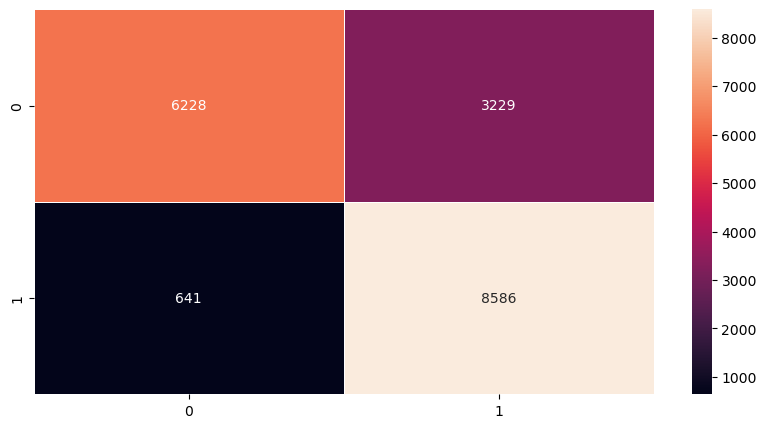

In [15]:
clf_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, clf_pred)
print(classification_report(y_test,clf_pred))
print('Accuracy',accuracy_score(y_test, clf_pred))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)
plt.show()

In [16]:
params = {
    'learning_rate': 0.005,
    "max_depth": 12,
    "num_leaves": 24,  
    "max_bin": 512,
    "num_iterations": 10000
}
model = lgb.LGBMClassifier(**params)
model.fit(X_train,y_train,
          eval_set=[(X_test, y_test)],
        early_stopping_rounds=1000)

[1]	valid_0's binary_logloss: 0.691051
[2]	valid_0's binary_logloss: 0.688932
[3]	valid_0's binary_logloss: 0.686835
[4]	valid_0's binary_logloss: 0.684758
[5]	valid_0's binary_logloss: 0.682702
[6]	valid_0's binary_logloss: 0.680663
[7]	valid_0's binary_logloss: 0.678644
[8]	valid_0's binary_logloss: 0.676644
[9]	valid_0's binary_logloss: 0.674665
[10]	valid_0's binary_logloss: 0.672704
[11]	valid_0's binary_logloss: 0.670763
[12]	valid_0's binary_logloss: 0.668841
[13]	valid_0's binary_logloss: 0.666938
[14]	valid_0's binary_logloss: 0.665058
[15]	valid_0's binary_logloss: 0.66319
[16]	valid_0's binary_logloss: 0.661344
[17]	valid_0's binary_logloss: 0.659512
[18]	valid_0's binary_logloss: 0.657697
[19]	valid_0's binary_logloss: 0.655901
[20]	valid_0's binary_logloss: 0.654121
[21]	valid_0's binary_logloss: 0.652362
[22]	valid_0's binary_logloss: 0.650616
[23]	valid_0's binary_logloss: 0.648885
[24]	valid_0's binary_logloss: 0.647177
[25]	valid_0's binary_logloss: 0.64548
[26]	valid_

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
Found `num_iterations` in params. Will use it instead of argument


[39]	valid_0's binary_logloss: 0.62329
[40]	valid_0's binary_logloss: 0.621811
[41]	valid_0's binary_logloss: 0.620344
[42]	valid_0's binary_logloss: 0.618887
[43]	valid_0's binary_logloss: 0.617447
[44]	valid_0's binary_logloss: 0.616018
[45]	valid_0's binary_logloss: 0.614599
[46]	valid_0's binary_logloss: 0.613196
[47]	valid_0's binary_logloss: 0.611806
[48]	valid_0's binary_logloss: 0.610424
[49]	valid_0's binary_logloss: 0.609057
[50]	valid_0's binary_logloss: 0.607702
[51]	valid_0's binary_logloss: 0.60636
[52]	valid_0's binary_logloss: 0.605025
[53]	valid_0's binary_logloss: 0.603707
[54]	valid_0's binary_logloss: 0.6024
[55]	valid_0's binary_logloss: 0.6011
[56]	valid_0's binary_logloss: 0.599816
[57]	valid_0's binary_logloss: 0.598543
[58]	valid_0's binary_logloss: 0.597273
[59]	valid_0's binary_logloss: 0.596022
[60]	valid_0's binary_logloss: 0.594771
[61]	valid_0's binary_logloss: 0.593533
[62]	valid_0's binary_logloss: 0.592308
[63]	valid_0's binary_logloss: 0.591091
[64]	v

LGBMClassifier(learning_rate=0.005, max_bin=512, max_depth=12,
               num_iterations=10000, num_leaves=24)

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      9457
           1       0.73      0.93      0.82      9227

    accuracy                           0.80     18684
   macro avg       0.82      0.80      0.80     18684
weighted avg       0.82      0.80      0.80     18684

Accuracy 0.7988118175979447


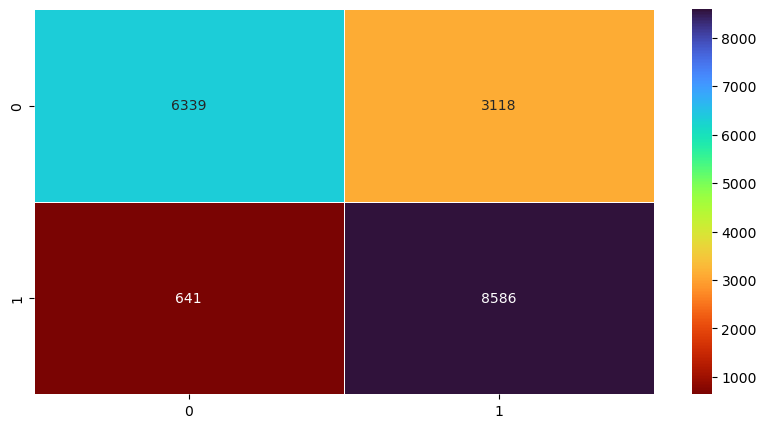

In [17]:
model_pred = model.predict(X_test)
cm = confusion_matrix(y_test, model_pred)
print(classification_report(y_test,model_pred))
print('Accuracy',accuracy_score(y_test, model_pred))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5,cmap='turbo_r')
plt.show()

In [18]:
import pickle 
lbgm_model_pkl = pickle.dump(model,open('LGBMClassifier.pkl','wb'))

# **XG Boost**

In [19]:
xg=xgb.XGBClassifier(
                    n_estimators =1000
                     )
    
evaluation = [( X_train, y_train), ( X_test, y_test)]
    
xg.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=20,verbose=100)

[0]	validation_0-auc:0.84150	validation_1-auc:0.84074


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[44]	validation_0-auc:0.87633	validation_1-auc:0.85677


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [37]:
print(len(X_test[0]))

14


              precision    recall  f1-score   support

           0       0.91      0.67      0.77      9457
           1       0.73      0.93      0.82      9227

    accuracy                           0.80     18684
   macro avg       0.82      0.80      0.79     18684
weighted avg       0.82      0.80      0.79     18684

Accuracy 0.7964033397559409


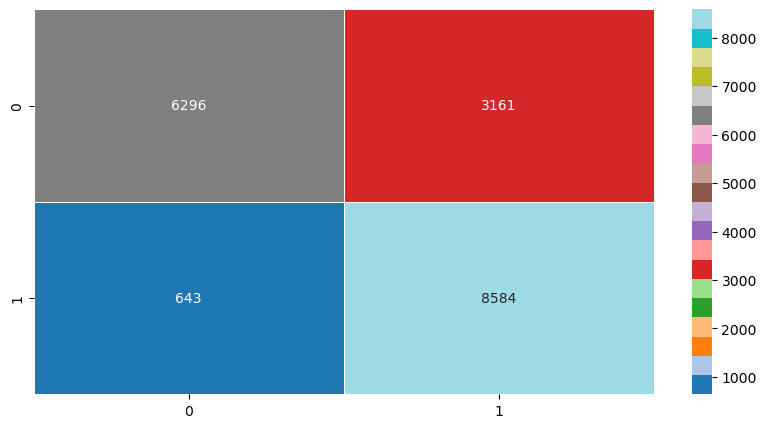

In [20]:
xg_pred = xg.predict(X_test)
cm = confusion_matrix(y_test, xg_pred)
print(classification_report(y_test,xg_pred))
print('Accuracy',accuracy_score(y_test, xg_pred))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5,cmap='tab20')
plt.show()

In [21]:
import pickle 
xgb_model_pkl = pickle.dump(xg,open('XGBClassifier.pkl','wb'))

In [22]:
print('Cat Boost',roc_auc_score(y_test, clf_pred))
print('XG Boost',roc_auc_score(y_test, xg_pred))
print('Light GBM',roc_auc_score(y_test, model_pred))

Cat Boost 0.7945448816893665
XG Boost 0.7980317245734599
Light GBM 0.8004135504003742


color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.


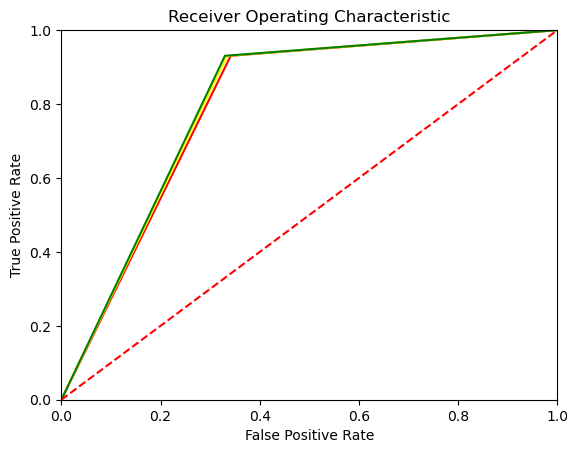

In [23]:
fpr, tpr, threshold = roc_curve(y_test, clf_pred)
fpr1, tpr1, threshold1 = roc_curve(y_test, xg_pred)
fpr2, tpr2, threshold1 = roc_curve(y_test, model_pred)
roc_auc =auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,color='red')
plt.plot(fpr1, tpr1,  label = 'AUC = %0.2f' % roc_auc,color='yellow')
plt.plot(fpr2, tpr2,  label = 'AUC = %0.2f' % roc_auc,color='green')


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **SHAP**

100%|===================| 18669/18684 [09:16<00:00]        

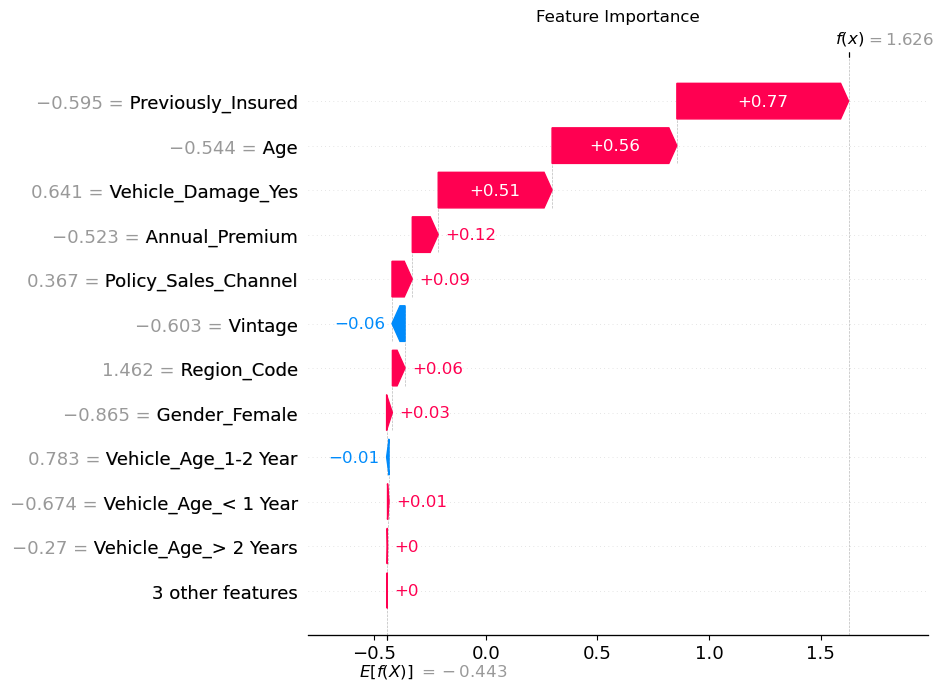

In [24]:
explainer = shap.Explainer(model, X_train,feature_names=x.columns.values.tolist())
shap_values = explainer(X_test)
plt.title('Feature Importance')
shap.plots.waterfall(shap_values[0],max_display=12)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


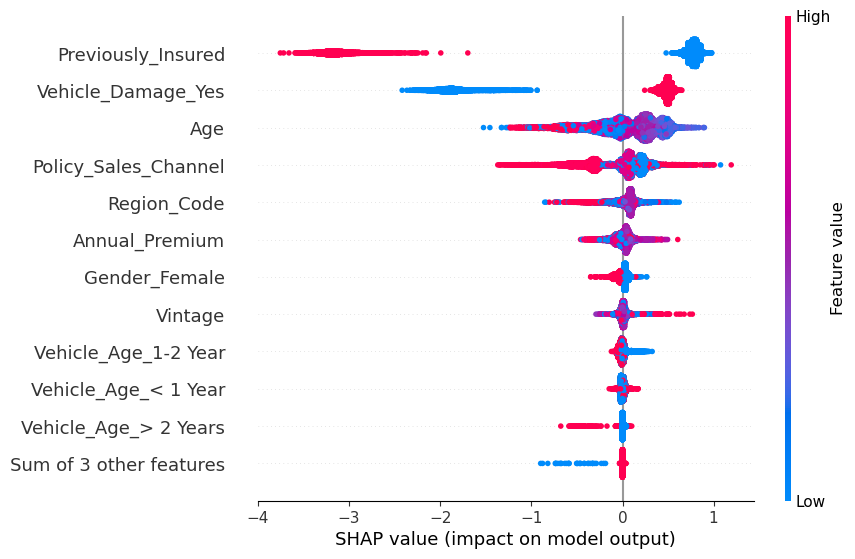

In [25]:
shap.plots.beeswarm(shap_values,max_display=12)

In [26]:
import boto3


s3 = boto3.resource('s3')
s3.meta.client.upload_file('CatBoostClassifier.pkl','pkl-files-s3','CatBoostClassifier.pkl')
s3.meta.client.upload_file('XGBClassifier.pkl','pkl-files-s3','XGBClassifier.pkl')
s3.meta.client.upload_file('LGBMClassifier.pkl','pkl-files-s3','LGBMClassifier.pkl')

In [27]:


cat_model_pkl = pickle.load(open('CatBoostClassifier.pkl','rb'))
print(cat_model_pkl)

cat_model_pkl.predict(X_train[10])



0

In [38]:
X_train[10].shape

(14,)

In [28]:
print(X_train[10])

[-0.40459628  0.04010279  0.1157625  -0.59540067 -0.40022173 -1.10214314
 -0.62699422  1.15566993 -1.15566993  0.78306634 -0.67396893 -0.26959865
  1.56066141 -1.56066141]
